In [1]:
#  Modélisation : comparaison de modèles supervisés  
# Dans ce notebook, nous allons comparer plusieurs algorithmes de Machine Learning pour prédire la consommation énergétique des bâtiments à Seattle. Nous évaluerons les performances avec les métriques **R²** et **MAE**.

In [2]:
# --- Modélisation : comparaison de plusieurs modèles

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error

# Revenir à la racine du projet
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

# Charger les données
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv").squeeze("columns")
y_test = pd.read_csv("data/y_test.csv").squeeze("columns")

print(" Données importées :")
print("X_train :", X_train.shape, "| y_train :", y_train.shape)


 Données importées :
X_train : (1211, 270) | y_train : (1211,)


In [4]:
# --- Comparaison de plusieurs modèles

models = {
    "Régression Linéaire": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Forêt Aléatoire": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Métriques d’évaluation
scoring = {
    "R2": make_scorer(r2_score),
    "MAE": make_scorer(mean_absolute_error)
}

results = {}

for name, model in models.items():
    print(f"\n Entraînement du modèle : {name}")
    try:
        scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
        results[name] = {
            "R2 (moyen)": np.mean(scores["test_R2"]),
            "MAE (moyen)": np.mean(scores["test_MAE"])
        }
    except Exception as e:
        print(f" Erreur avec {name} : {e}")

# Résultats sous forme de DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="R2 (moyen)", ascending=False)
display(results_df)

best_model_name = results_df.index[0]
print(f"\n Meilleur modèle : {best_model_name}")




 Entraînement du modèle : Régression Linéaire
 Erreur avec Régression Linéaire : 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\selma\Desktop\projet_seattle\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\selma\Desktop\projet_seattle\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\selma\Desktop\projet_seattle\.venv\Lib\site-packages\sklearn\linear_model\_base.py", line 618, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c

,R2 (moyen),MAE (moyen)
Forêt Aléatoire,0.971764,472149.9855



 Meilleur modèle : Forêt Aléatoire


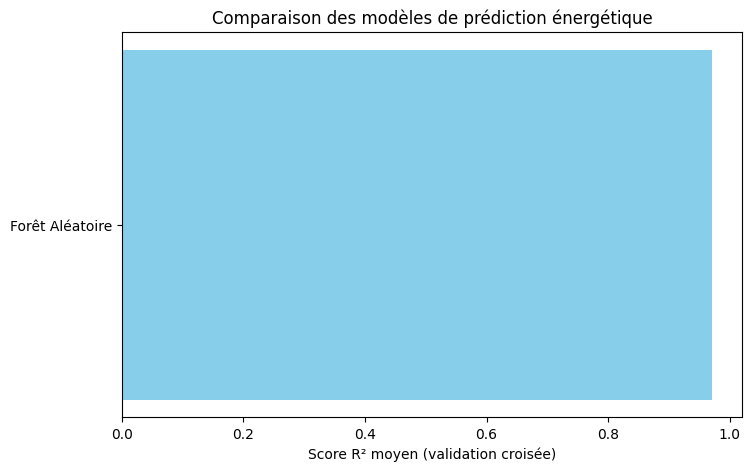

In [5]:
# --- Visualisation des performances

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(results_df.index, results_df["R2 (moyen)"], color="skyblue")
plt.xlabel("Score R² moyen (validation croisée)")
plt.title("Comparaison des modèles de prédiction énergétique")
plt.gca().invert_yaxis()
plt.show()

